In [ ]:
import yfinance as yf
import pandas as pd

symbols = ["TSLA", "BND", "SPY"]
start = "2015-07-01"
end = "2025-07-31"
data = {}

for sym in symbols:
    df = yf.download(sym, start=start, end=end, progress=False, auto_adjust=False)
    df.index = pd.to_datetime(df.index)
    df = df.sort_index()
    df = df[["Adj Close", "Open", "High", "Low", "Close", "Volume"]]
    df["Daily_Return"] = df["Adj Close"].pct_change()
    df = df.dropna()
    data[sym] = df
    display(df.head())

Price,Adj Close,Open,High,Low,Close,Volume,Daily_Return
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,
Date,,,,,,,
2015-07-02,18.667999,18.680000,18.830000,18.220667,18.667999,107458500,0.040386
2015-07-06,18.648001,18.591999,18.779333,18.420000,18.648001,61828500,-0.001071
2015-07-07,17.858667,18.333332,18.346666,17.384666,17.858667,91576500,-0.042328
2015-07-08,16.997334,17.288000,17.386667,16.954000,16.997334,93316500,-0.048231
2015-07-09,17.194668,17.271999,17.530001,17.119333,17.194668,50011500,0.011610


Price,Adj Close,Open,High,Low,Close,Volume,Daily_Return
Ticker,BND,BND,BND,BND,BND,BND,
Date,,,,,,,
2015-07-02,60.967113,81.059998,81.180000,81.059998,81.099998,1060100,0.002472
2015-07-06,61.177570,81.440002,81.440002,81.220001,81.379997,2210700,0.003452
2015-07-07,61.237732,81.690002,81.769997,81.459999,81.459999,4183200,0.000983
2015-07-08,61.410641,81.639999,81.760002,81.559998,81.690002,1967800,0.002824
2015-07-09,61.207623,81.559998,81.580002,81.379997,81.419998,1670900,-0.003306


Price,Adj Close,Open,High,Low,Close,Volume,Daily_Return
Ticker,SPY,SPY,SPY,SPY,SPY,SPY,
Date,,,,,,,
2015-07-02,174.756943,208.070007,208.270004,206.809998,207.309998,104373700,-0.000916
2015-07-06,174.259613,205.770004,207.649994,205.529999,206.720001,117975400,-0.002846
2015-07-07,175.355484,206.960007,208.169998,204.110001,208.020004,173820200,0.006289
2015-07-08,172.413437,206.419998,206.759995,204.250000,204.529999,164020100,-0.016778
2015-07-09,172.725327,207.039993,207.350006,204.770004,204.899994,144113100,0.001809


In [5]:
for sym, df in data.items():
    print(f"--- {sym} ---")
    print(df.info())
    print(df.describe())
    print(df.isna().sum())


--- TSLA ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2534 entries, 2015-07-02 to 2025-07-30
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, TSLA)  2534 non-null   float64
 1   (Open, TSLA)       2534 non-null   float64
 2   (High, TSLA)       2534 non-null   float64
 3   (Low, TSLA)        2534 non-null   float64
 4   (Close, TSLA)      2534 non-null   float64
 5   (Volume, TSLA)     2534 non-null   int64  
 6   (Daily_Return, )   2534 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 158.4 KB
None
Price     Adj Close         Open         High          Low        Close  \
Ticker         TSLA         TSLA         TSLA         TSLA         TSLA   
count   2534.000000  2534.000000  2534.000000  2534.000000  2534.000000   
mean     132.007998   132.045559   135.006516   128.881628   132.007998   
std      120.917540   121.036867   123.786412   117.999310   120.917540   

Price         Ticker
Adj Close     TSLA      0
Open          TSLA      0
High          TSLA      0
Low           TSLA      0
Close         TSLA      0
Volume        TSLA      0
Daily_Return            0
dtype: int64
Price         Ticker
Adj Close     BND       0
Open          BND       0
High          BND       0
Low           BND       0
Close         BND       0
Volume        BND       0
Daily_Return            0
dtype: int64
Price         Ticker
Adj Close     SPY       0
Open          SPY       0
High          SPY       0
Low           SPY       0
Close         SPY       0
Volume        SPY       0
Daily_Return            0
dtype: int64


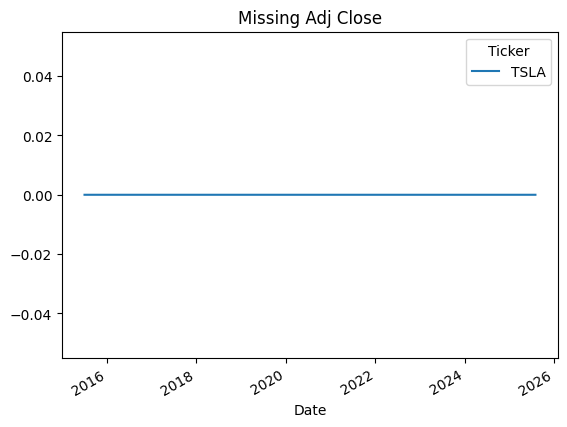

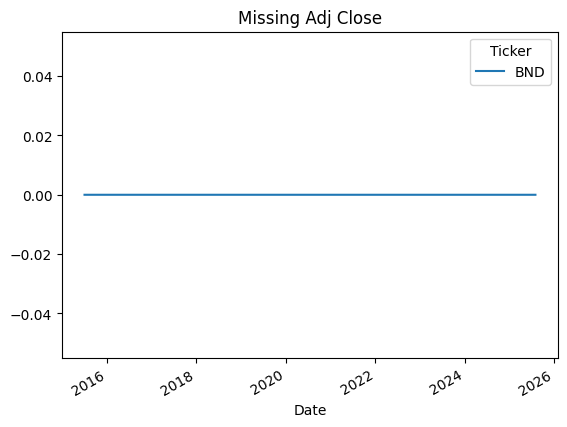

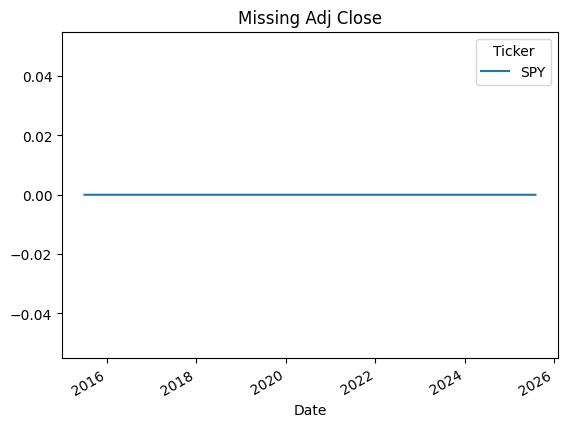

In [ ]:
for sym, df in data.items():
 print(df.isna().sum())  # See how many missing in each column

# Optional: Visual check of missing Adj Close
import matplotlib.pyplot as plt

for sym, df in data.items():
    df["Adj Close"].isna().astype(int).plot()
    plt.title("Missing Adj Close")
    plt.show()

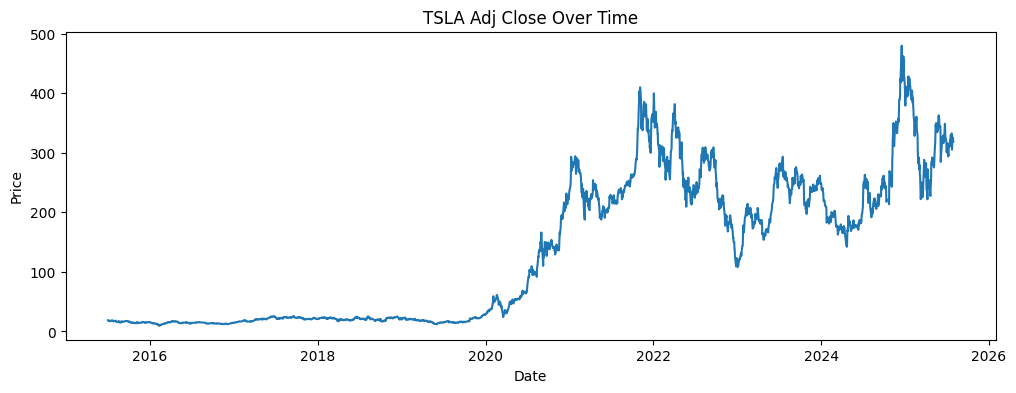

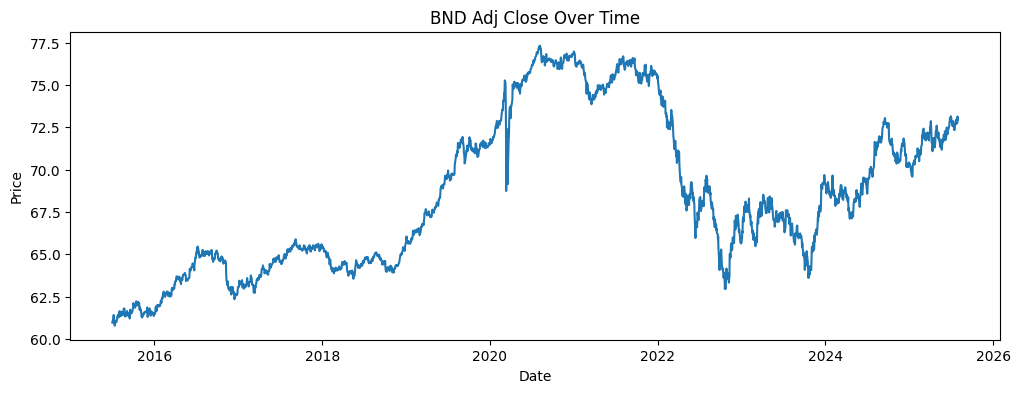

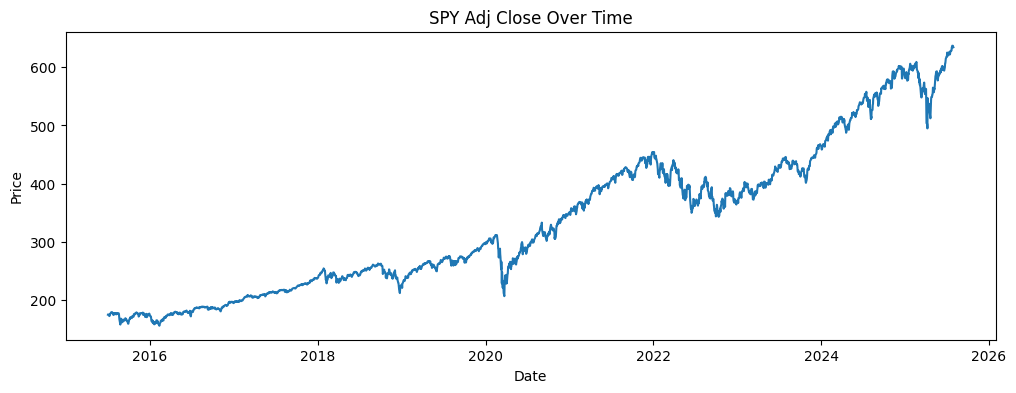

In [7]:
# Visualize closing prices
import matplotlib.pyplot as plt

for sym, df in data.items():
    plt.figure(figsize=(12,4))
    plt.plot(df.index, df["Adj Close"])
    plt.title(f"{sym} Adj Close Over Time")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.show()

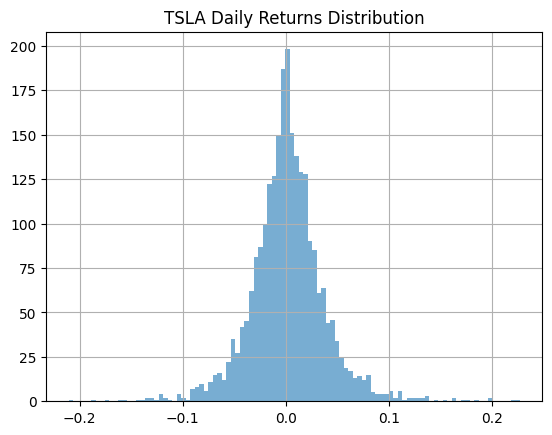

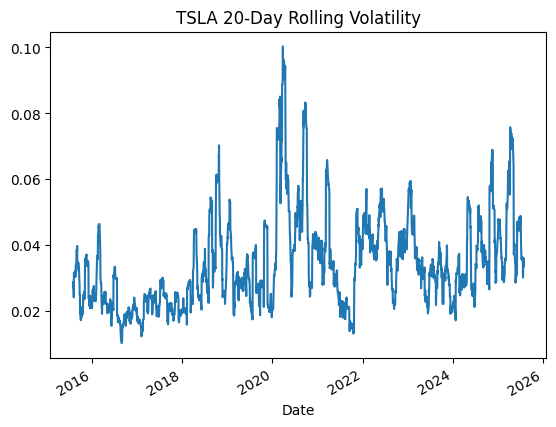

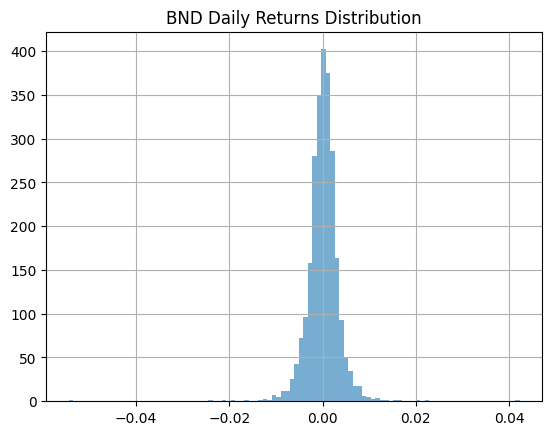

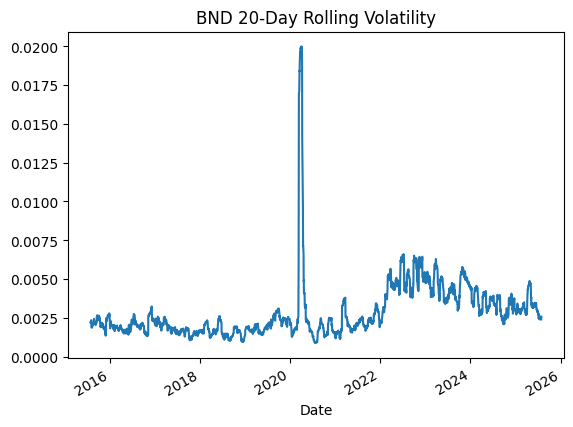

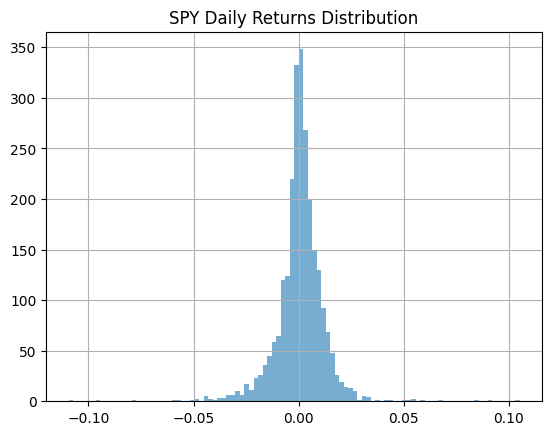

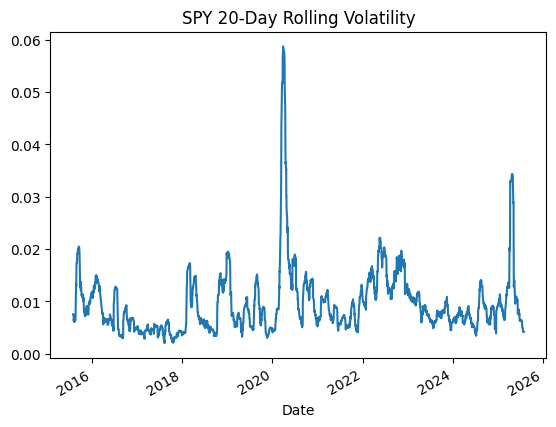

In [8]:
#Analyze daily returns (volatility)
import seaborn as sns

for sym, df in data.items():
    df["Daily_Return"].hist(bins=100, alpha=0.6)
    plt.title(f"{sym} Daily Returns Distribution")
    plt.show()

    # Rolling volatility
    df["Volatility"] = df["Daily_Return"].rolling(window=20).std()
    df["Volatility"].plot(title=f"{sym} 20-Day Rolling Volatility")
    plt.show()


In [9]:
# Outlier detection, z-score
from scipy.stats import zscore

for sym, df in data.items():
    df["zscore"] = zscore(df["Daily_Return"])
    outliers = df[df["zscore"].abs() > 3]  # unusual returns
    print(f"{sym} outliers:\n", outliers[["Adj Close", "Daily_Return"]])

TSLA outliers:
 Price        Adj Close Daily_Return
Ticker            TSLA             
Date                               
2018-08-02   23.302668     0.161880
2018-09-28   17.651333    -0.139015
2018-10-01   20.713333     0.173471
2018-10-23   19.609333     0.127189
2019-01-18   20.150667    -0.129711
2019-07-25   15.254667    -0.136137
2019-10-24   19.978666     0.176692
2020-02-03   52.000000     0.198949
2020-02-04   59.137333     0.137256
2020-02-05   48.980000    -0.171758
2020-02-27   45.266666    -0.128146
2020-03-09   40.533333    -0.135725
2020-03-12   37.369999    -0.116172
2020-03-16   29.671333    -0.185778
2020-03-18   24.081333    -0.160344
2020-03-19   28.509333     0.183877
2020-03-24   33.666668     0.162817
2020-04-13   43.396667     0.136038
2020-07-06   91.438667     0.134794
2020-08-12  103.650665     0.131236
2020-08-31  166.106674     0.125689
2020-09-08  110.070000    -0.210628
2020-09-14  139.873337     0.125832
2021-03-09  224.526672     0.196412
2021-10-25  

In [ ]:
# Seasonality & Trends - Stationarity test using Augmented Dickey-Fuller (ADF):
from statsmodels.tsa.stattools import adfuller

for sym, df in data.items():
    result = adfuller(df["Adj Close"])
    print(f"{sym} ADF Statistic: {result[0]:.4f}, p-value: {result[1]:.4f}")

# p < 0.05 → stationary
# p >= 0.05 → non-stationary (may need differencing for ARIMA)

TSLA ADF Statistic: -1.4195, p-value: 0.5729
BND ADF Statistic: -1.5371, p-value: 0.5151
SPY ADF Statistic: 0.6992, p-value: 0.9898


In [12]:
#Volatility & Risk Metrics

#Rolling statistics
window = 20
for sym, df in data.items():
    df["Rolling_Mean"] = df["Daily_Return"].rolling(window).mean()
    df["Rolling_Std"] = df["Daily_Return"].rolling(window).std()

# Value at Risk (VaR):
confidence_level = 0.05
for sym, df in data.items():
    VaR = df["Daily_Return"].quantile(confidence_level)
    print(f"{sym} 5% Daily VaR: {VaR:.4f}")

#Sharpe Ratio (annualized, assuming 252 trading days):
for sym, df in data.items():
    sharpe_ratio = (df["Daily_Return"].mean() / df["Daily_Return"].std()) * (252**0.5)
    print(f"{sym} Annualized Sharpe Ratio: {sharpe_ratio:.2f}")


TSLA 5% Daily VaR: -0.0547
BND 5% Daily VaR: -0.0049
SPY 5% Daily VaR: -0.0172
TSLA Annualized Sharpe Ratio: 0.78
BND Annualized Sharpe Ratio: 0.36
SPY Annualized Sharpe Ratio: 0.79
